In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.linalg import inv
%matplotlib inline 
from sklearn.cluster import KMeans 
from scipy.stats import chi2
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.mosaicplot import mosaic 

#Importing the data
df = pd.read_csv('WineKMC_MD copy 2.csv')
df.shape

#32 observations and 8 variables

(32, 8)

In [2]:
df.head(10)

,Offer #,Customer Last Name,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,Thomas,January,Malbec,72,56,France,False
1,2,Smith,January,Pinot Noir,72,17,France,False
2,3,Lee,February,Espumante,144,32,Oregon,True
3,4,Thomas,February,Champagne,72,48,France,True
4,5,Sanchez,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,Miller,March,Prosecco,144,86,Chile,False
6,7,Brown,March,Prosecco,6,40,Australia,True
7,8,Jones,March,Espumante,6,45,South Africa,False
8,9,Thomas,April,Chardonnay,144,57,Chile,False
9,10,Miller,April,Prosecco,72,52,California,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Offer #             32 non-null     int64 
 1   Customer Last Name  32 non-null     object
 2   Campaign            32 non-null     object
 3   Varietal            32 non-null     object
 4   Minimum Qty (kg)    32 non-null     int64 
 5   Discount (%)        32 non-null     int64 
 6   Origin              32 non-null     object
 7   Past Peak           32 non-null     bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 1.9+ KB


In [4]:
kg = df['Minimum Qty (kg)']
kg.describe()

count     32.000000
mean      65.812500
std       50.785722
min        6.000000
25%       12.000000
50%       72.000000
75%       72.000000
max      144.000000
Name: Minimum Qty (kg), dtype: float64

In [5]:
df.describe()

,Offer #,Minimum Qty (kg),Discount (%)
count,32.000000,32.000000,32.000000
mean,16.500000,65.812500,57.843750
std,9.380832,50.785722,20.770807
min,1.000000,6.000000,17.000000
25%,8.750000,12.000000,44.750000
50%,16.500000,72.000000,55.000000
75%,24.250000,72.000000,82.250000
max,32.000000,144.000000,89.000000


In [7]:
#Checking for correlation between variables Minimum Qty (kg) and Discount
discount = df['Discount (%)']
discount.describe()

#There doesn't seem to be any significant correlation between the 2 variables as the p-value is greater than 0.05
#Average discount amoung 57.8

count    32.000000
mean     57.843750
std      20.770807
min      17.000000
25%      44.750000
50%      55.000000
75%      82.250000
max      89.000000
Name: Discount (%), dtype: float64

In [8]:
df_na = df.isna()
df_na.head()

,Offer #,Customer Last Name,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [9]:
df_na.sum()
#Doesn't have any NA values

Offer #               0
Customer Last Name    0
Campaign              0
Varietal              0
Minimum Qty (kg)      0
Discount (%)          0
Origin                0
Past Peak             0
dtype: int64

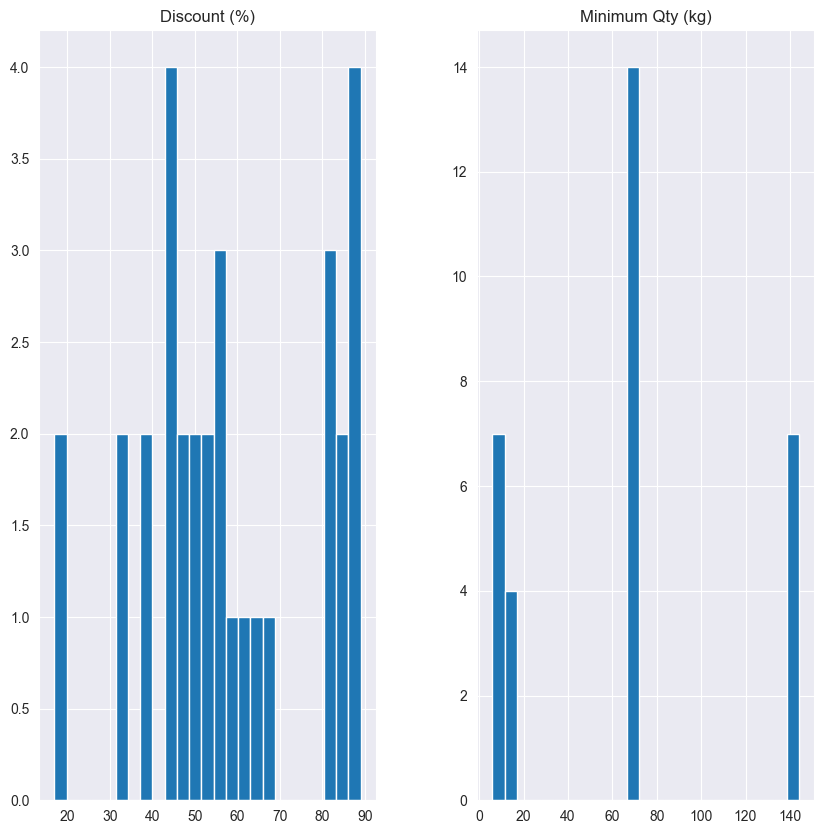

In [10]:
selected_df = df[['Discount (%)', 'Minimum Qty (kg)']]
selected_df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

#Minimum Qty and Discount are not normally distributed

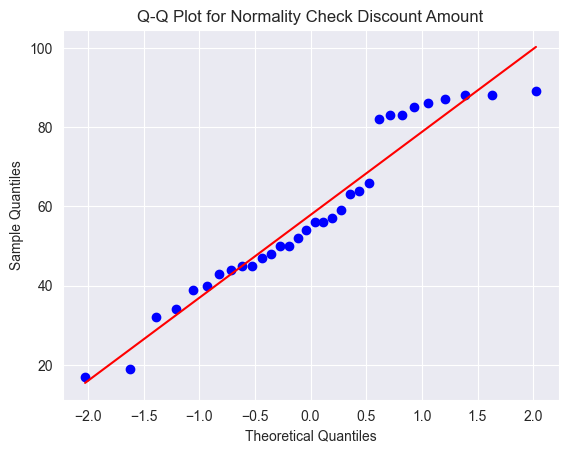

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Create a Q-Q plot
probplot(discount, dist="norm", plot=plt)

# Add a reference line for a perfect normal distribution
plt.title('Q-Q Plot for Normality Check Discount Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

# Generate a sample dataset (replace this with your data)
# Shapiro-Wilk test for normality
stat, p_value = shapiro(selected_df)
print(f'Shapiro-Wilk Test - Statistic: {stat}, p-value: {p_value}')

# Q-Q plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.probplot(selected_df, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

Shapiro-Wilk Test - Statistic: 0.9079059362411499, p-value: 0.0001610986073501408


AttributeError: module 'seaborn' has no attribute 'probplot'

<Figure size 800x600 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x14a3f1f50>,
 'caps': [<matplotlib.lines.Line2D at 0x14a3f1350>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a3db690>],
 'medians': [<matplotlib.lines.Line2D at 0x14a3f3350>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a3f3a10>],
 'means': []}

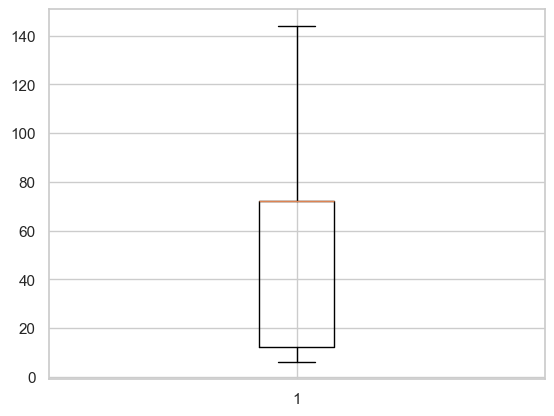

In [13]:
#Checking for outliers
plt.boxplot(kg)

{'whiskers': [<matplotlib.lines.Line2D at 0x14a43fd90>,
 'caps': [<matplotlib.lines.Line2D at 0x14a44d350>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a43f950>],
 'medians': [<matplotlib.lines.Line2D at 0x14a44e450>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a44ed10>],
 'means': []}

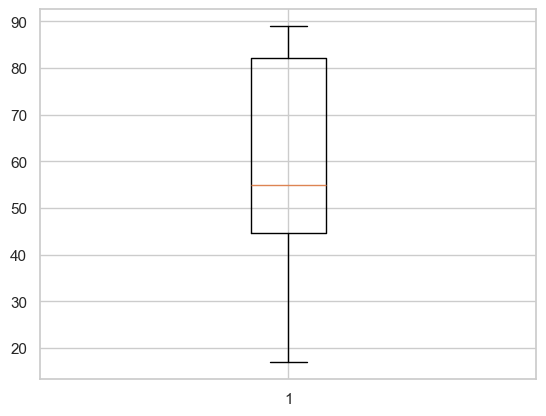

In [14]:
plt.boxplot(discount)

#no univariate outliers

In [15]:
selected_df = df[['Discount (%)', 'Minimum Qty (kg)']]
print(selected_df)

    Discount (%)  Minimum Qty (kg)
0             56                72
1             17                72
2             32               144
3             48                72
4             44               144
5             86               144
6             40                 6
7             45                 6
8             57               144
9             52                72
10            85                72
11            83                72
12            43                 6
13            64                72
14            19               144
15            88                72
16            47                12
17            50                 6
18            66                12
19            82                72
20            50                12
21            63                72
22            39               144
23            34                 6
24            59                72
25            83               144
26            88                72
27            56    

In [16]:
discount = df['Discount (%)']

def z_score_method(discount):
    threshold = 3 # 3 standard deviations

    burglary_mean = np.mean(discount)
    burglary_sd = np.std(discount)
    z_score = [(i - burglary_mean) / burglary_sd for i in discount]
    return np.where(np.abs(z_score) > threshold)

z_score_method(discount)

(array([], dtype=int64),)

In [17]:
quantity = df['Minimum Qty (kg)']

def z_score_method(quantity):
    threshold = 3 # 3 standard deviations

    burglary_mean = np.mean(quantity)
    burglary_sd = np.std(quantity)
    z_score = [(i - burglary_mean) / burglary_sd for i in quantity]
    return np.where(np.abs(z_score) > threshold)

z_score_method(quantity)

(array([], dtype=int64),)

In [18]:
import numpy as np
import scipy as sp
from scipy.stats import chi2

# Assuming df is your DataFrame
selected_df = df[['Discount (%)', 'Minimum Qty (kg)']]

def mahalanobis_method(selected_df):
    C = np.sqrt(chi2.ppf((1 - 0.001), df=selected_df.shape[0]))

    x_minus_mu = selected_df - np.mean(selected_df, axis=0)  # M-Distance
    cov = np.cov(selected_df.values.T)                      # Covariance
    inv_covmat = np.linalg.inv(cov)                          # Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    return np.where(md > C)

outliers = mahalanobis_method(selected_df)
print(outliers)

#No multivariate outliers either

(array([], dtype=int64),)


In [19]:
peak = df['Past Peak']
peak.sum()
#Only 7 of the wines are Past Peak, and high quality

7

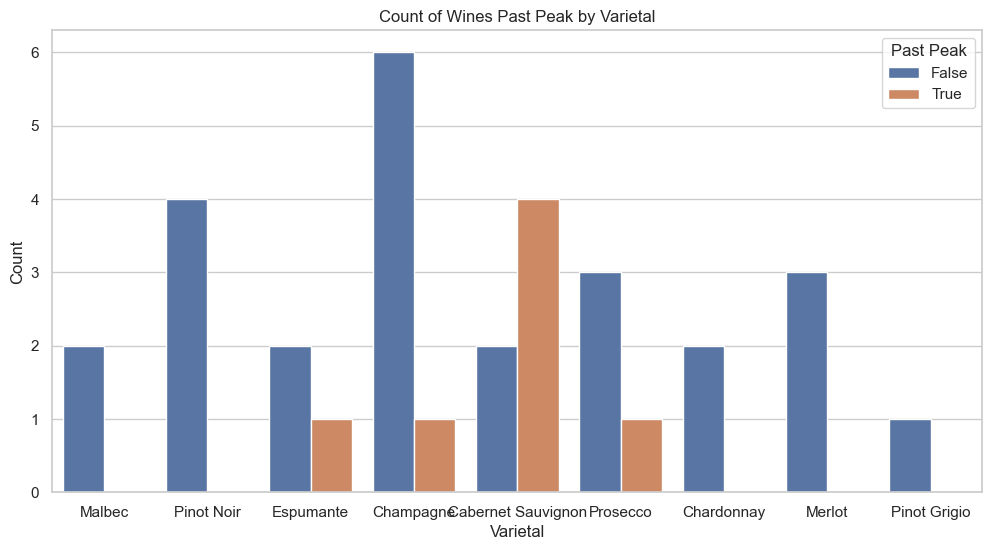

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Varietal', hue='Past Peak', data=df)
plt.title('Count of Wines Past Peak by Varietal')
plt.xlabel('Varietal')
plt.ylabel('Count')
plt.show()


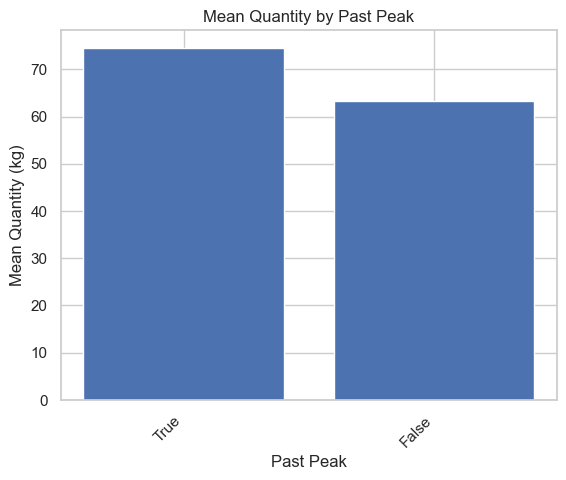

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

mean_true_quantities = df[df['Past Peak'] == True]['Minimum Qty (kg)'].mean()
mean_false_quantities = df[df['Past Peak'] == False]['Minimum Qty (kg)'].mean()

plt.bar(['True', 'False'], [mean_true_quantities, mean_false_quantities])
plt.xlabel('Past Peak')
plt.ylabel('Mean Quantity (kg)')
plt.title('Mean Quantity by Past Peak')
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
#Checking the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[['Discount (%)', 'Minimum Qty (kg)']]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)


            feature       VIF
0      Discount (%)  2.338832
1  Minimum Qty (kg)  2.338832


AttributeError: module 'matplotlib.pyplot' has no attribute 'patches'

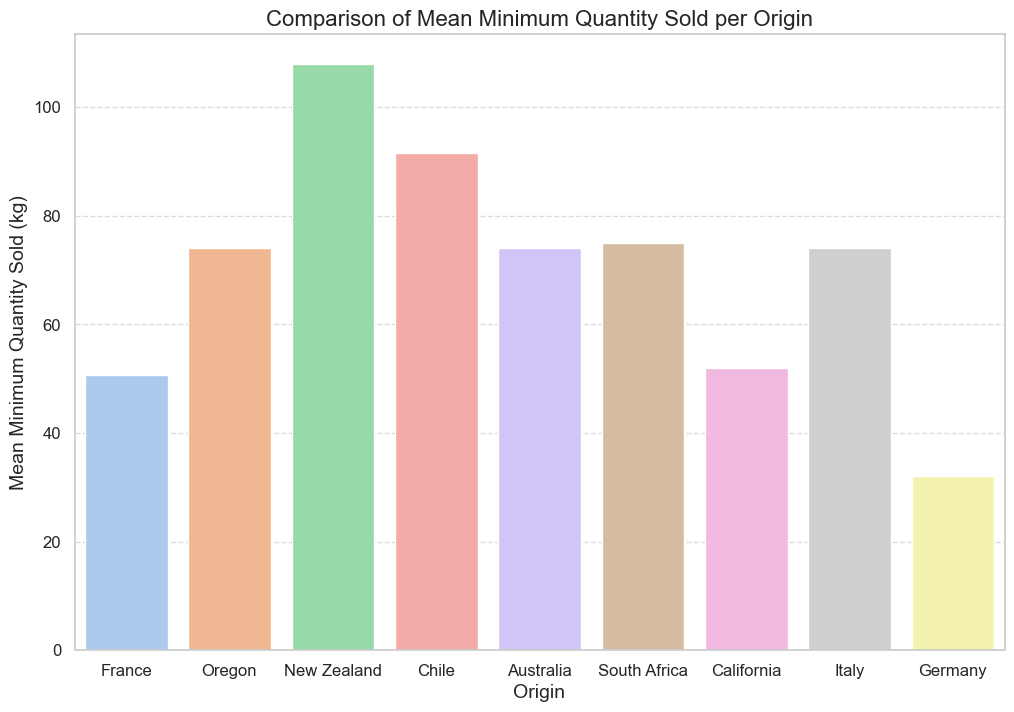

In [23]:
# Set a custom color palette for better visibility
custom_palette = sns.color_palette("pastel")

# Bar plot without error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Origin', y='Minimum Qty (kg)', data=df, ci=None, palette=custom_palette)
plt.title('Comparison of Mean Minimum Quantity Sold per Origin', fontsize=16)
plt.xlabel('Origin', fontsize=14)
plt.ylabel('Mean Minimum Quantity Sold (kg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of each bar for better clarity
for p in plt.patches:
    plt.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'patches'

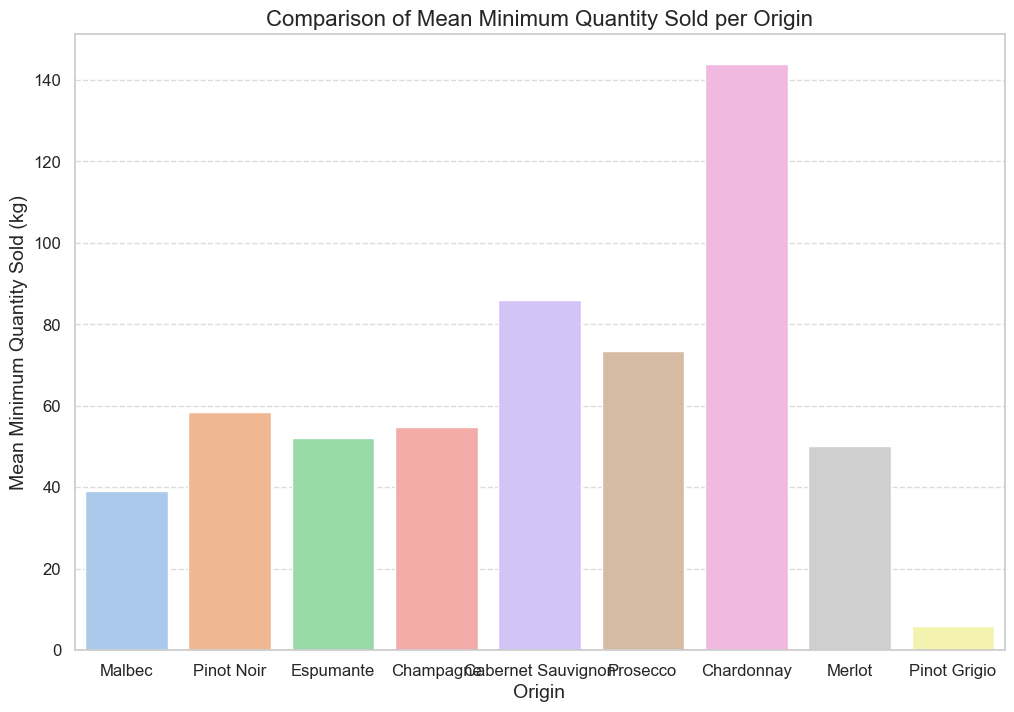

In [24]:
# Set a custom color palette for better visibility
custom_palette = sns.color_palette("pastel")

# Bar plot without error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Varietal', y='Minimum Qty (kg)', data=df, ci=None, palette=custom_palette)
plt.title('Comparison of Mean Minimum Quantity Sold per Origin', fontsize=16)
plt.xlabel('Origin', fontsize=14)
plt.ylabel('Mean Minimum Quantity Sold (kg)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of each bar for better clarity
for p in plt.patches:
    plt.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.show()

In [25]:
origin = df['Origin']

# Count the categories
category_counts = df['Origin'].value_counts()

# Display the result
print(category_counts)

#Most of the wines are from France

Origin
France          9
Chile           4
Oregon          3
Australia       3
California      3
Italy           3
Germany         3
New Zealand     2
South Africa    2
Name: count, dtype: int64


In [26]:
origin = df['Varietal']

# Count the categories
category_counts = df['Varietal'].value_counts()

# Display the result
print(category_counts)

#Champagne and Cabernet Sauvignon are the most popular ones

Varietal
Champagne             7
Cabernet Sauvignon    6
Pinot Noir            4
Prosecco              4
Espumante             3
Merlot                3
Malbec                2
Chardonnay            2
Pinot Grigio          1
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

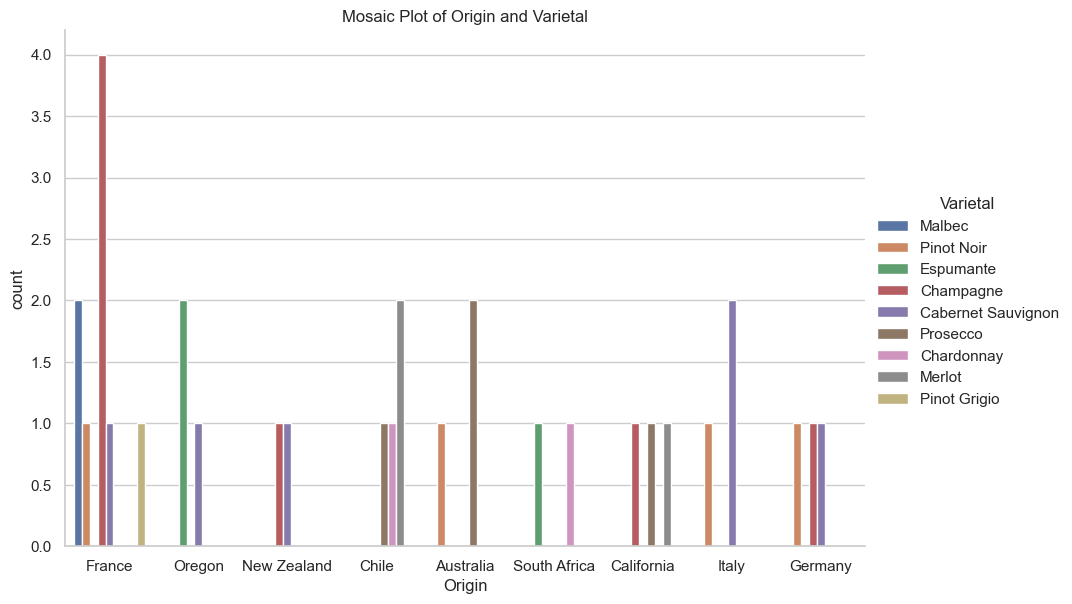

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.catplot(x="Origin", hue="Varietal", data=df, kind="count", height=6, aspect=1.5)
plt.title('Mosaic Plot of Origin and Varietal')
plt.show()

#Graphing to visualise the relationship between Origin and Varietal

In [28]:
campaign = df['Campaign']

# Count the categories
category_counts = df['Campaign'].value_counts()

# Display the result
print(category_counts)

Campaign
February     3
March        3
May          3
June         3
July         3
August       3
October      3
December     3
January      2
April        2
September    2
November     2
Name: count, dtype: int64


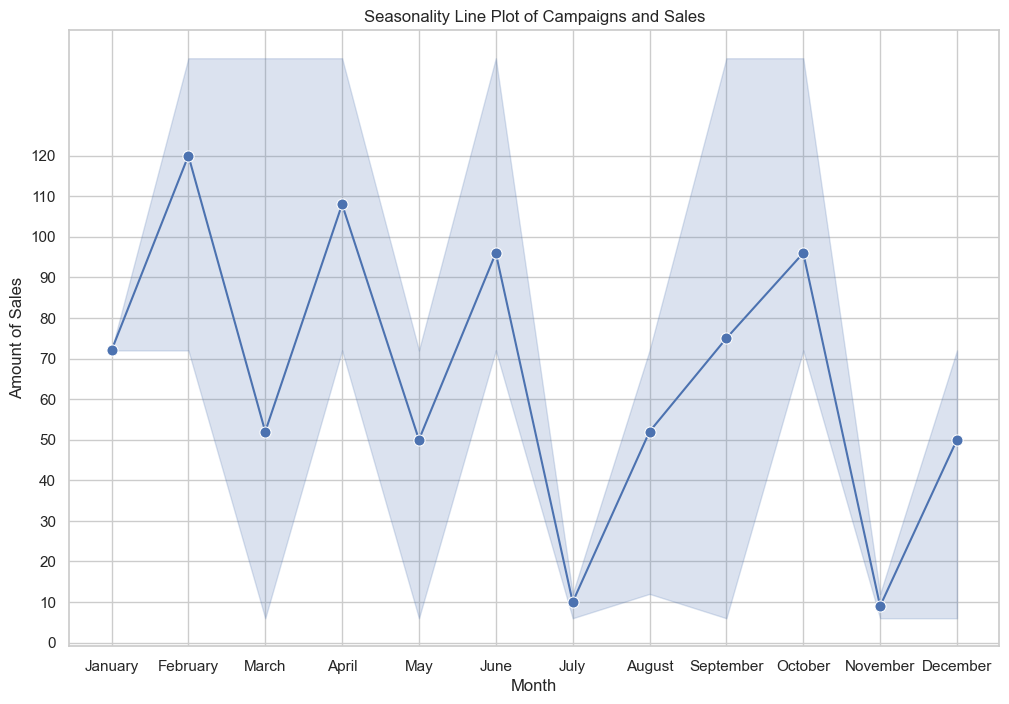

In [29]:
#Creating a line plot to understand seasonality and discover possible patterns of Campaigns and better sales
plt.figure(figsize=(12, 8))
sns.lineplot(x='Campaign', y='Minimum Qty (kg)', data=df, marker='o', markersize=8)
plt.title('Seasonality Line Plot of Campaigns and Sales')
plt.xlabel('Month')
plt.ylabel('Amount of Sales')

plt.yticks(range(0, 121, 10))

plt.show()


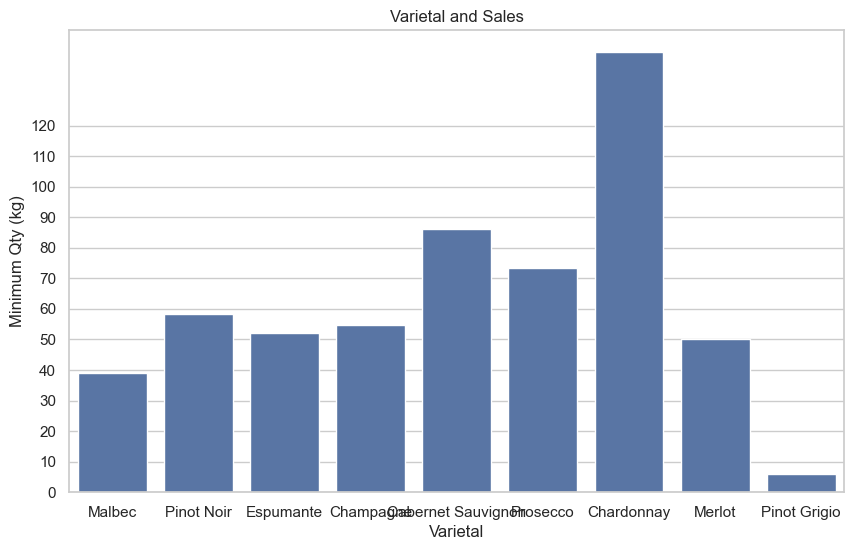

In [30]:
#Bar plot to understand which Varietals sell the best
plt.figure(figsize=(10, 6))
sns.barplot(x="Varietal", y="Minimum Qty (kg)", data=df, ci=None)

plt.title('Varietal and Sales')
plt.yticks(range(0, 121, 10))
plt.show()

#Chardonnay seems to be the most popular wine, it's from Chile and South Africa, maybe the salesman should go there more?

In [31]:
correlation = df['Discount (%)'].corr(df['Minimum Qty (kg)'])

print(f"Correlation between Discount and Minimum Qty: {correlation}")

#There's no correlation between the discount and sales, so there are other factors salesman should focus on and not making discounts

Correlation between Discount and Minimum Qty: 0.028594595331033576


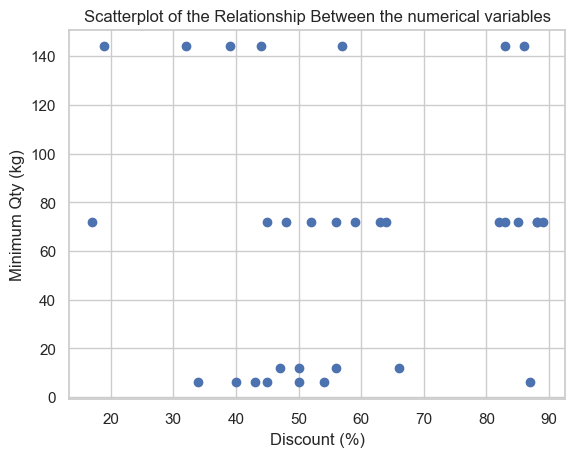

In [32]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the dependent variable 'y' and independent variable 'x'
plt.scatter(df['Discount (%)'], df['Minimum Qty (kg)'])
plt.xlabel('Discount (%)')
plt.ylabel('Minimum Qty (kg)')
plt.title('Scatterplot of the Relationship Between the numerical variables')
plt.show()

Clustering

In [33]:
#Dropping unnecessary variables

df = pd.read_csv('WineKMC_MD copy 2.csv')
df.drop(['Offer #', 'Customer Last Name'], axis=1, inplace=True)


In [34]:
df['Past Peak'] = df['Past Peak'].astype(int)
df.head(10)

,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,January,Malbec,72,56,France,0
1,January,Pinot Noir,72,17,France,0
2,February,Espumante,144,32,Oregon,1
3,February,Champagne,72,48,France,1
4,February,Cabernet Sauvignon,144,44,New Zealand,1
5,March,Prosecco,144,86,Chile,0
6,March,Prosecco,6,40,Australia,1
7,March,Espumante,6,45,South Africa,0
8,April,Chardonnay,144,57,Chile,0
9,April,Prosecco,72,52,California,0


In [35]:
selected_df = df[['Discount (%)', 'Minimum Qty (kg)', 'Past Peak']]
print(selected_df)

    Discount (%)  Minimum Qty (kg)  Past Peak
0             56                72          0
1             17                72          0
2             32               144          1
3             48                72          1
4             44               144          1
5             86               144          0
6             40                 6          1
7             45                 6          0
8             57               144          0
9             52                72          0
10            85                72          0
11            83                72          0
12            43                 6          0
13            64                72          0
14            19               144          0
15            88                72          0
16            47                12          0
17            50                 6          0
18            66                12          0
19            82                72          0
20            50                12

In [36]:
#Normalizing the numerical variables
from sklearn.preprocessing import normalize

data_scaled = normalize(selected_df)
data_scaled = pd.DataFrame(data_scaled, columns=selected_df.columns)
data_scaled.head()

,Discount (%),Minimum Qty (kg),Past Peak
0,0.613941,0.789352,0.000000
1,0.229793,0.973240,0.000000
2,0.216925,0.976165,0.006779
3,0.554663,0.831995,0.011555
4,0.292212,0.956330,0.006641


In [37]:
data_scaled.columns

Index(['Discount (%)', 'Minimum Qty (kg)', 'Past Peak'], dtype='object')

In [38]:
data_scaled.describe()

,Discount (%),Minimum Qty (kg),Past Peak
count,32.000000,32.000000,32.000000
mean,0.693423,0.583978,0.002802
std,0.273816,0.329940,0.006070
min,0.130811,0.068802,0.000000
25%,0.525657,0.201844,0.000000
50%,0.753414,0.657539,0.000000
75%,0.979208,0.850590,0.000000
max,0.997630,0.991407,0.024716


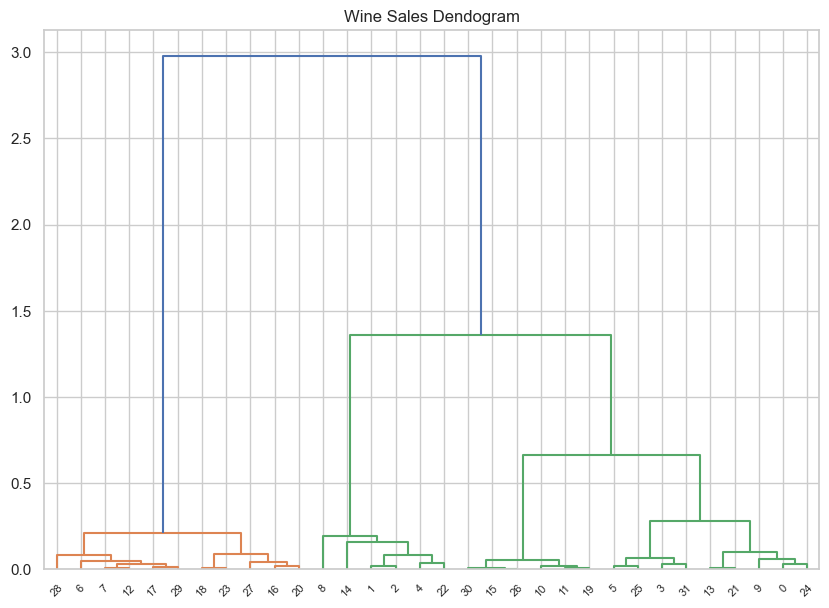

In [39]:
import scipy.cluster.hierarchy as shc
plt.figure('Figure.1', figsize=(10,7))
plt.title("Wine Sales Dendogram")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward', metric='euclidean'))

As the threshold I chose 1.5, and decided to create 3 clusters

In [40]:
#creating the clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [41]:
selected_df = df[['Discount (%)', 'Minimum Qty (kg)', 'Past Peak']]

data_scaled = normalize(selected_df)
data_scaled = pd.DataFrame(data_scaled,columns=selected_df.columns)
data_scaled.head()

,Discount (%),Minimum Qty (kg),Past Peak
0,0.613941,0.789352,0.000000
1,0.229793,0.973240,0.000000
2,0.216925,0.976165,0.006779
3,0.554663,0.831995,0.011555
4,0.292212,0.956330,0.006641


In [42]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data_scaled)

custom_cmap = ListedColormap(['purple', 'yellow', 'blue'])

plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_scaled['Minimum Qty (kg)'], data_scaled['Discount (%)'], c=cluster_labels, cmap=custom_cmap)

plt.colorbar(scatter, label='Cluster Labels')

plt.xlabel('Minimum Qty (kg)')
plt.ylabel('Discount (%)')
plt.title('Hierarchical Clustering Scatter Plot')

plt.show()

NameError: name 'ListedColormap' is not defined

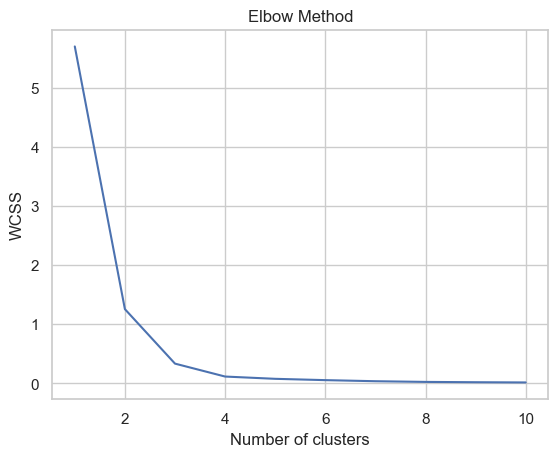

In [43]:
#K-means Clustering 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Based on the Elbow Method we can see that 3 is the mmost optimal number of K, peak drop is between 3-4 but as there aren't many obervations we choose 3

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,random_state=0)
pred_y = kmeans.fit_predict(data_scaled);
print(pd.DataFrame(pred_y, columns=['pred_y']))

    pred_y
0        1
1        2
2        2
3        1
4        2
5        1
6        0
7        0
8        2
9        1
10       1
11       1
12       0
13       1
14       2
15       1
16       0
17       0
18       0
19       1
20       0
21       1
22       2
23       0
24       1
25       1
26       1
27       0
28       0
29       0
30       1
31       1


In [45]:
print(pd.DataFrame(kmeans.cluster_centers_,columns=['Minimum Qty (kg)','Discount (%)', 'Past Peak'])) 

   Minimum Qty (kg)  Discount (%)  Past Peak
0          0.985661      0.159996   0.003834
1          0.656538      0.742344   0.002272
2          0.249867      0.965363   0.002237


First cluster shows that the highest quantity sold had a 51% discount. There's no need to increase the discount amount as it doesn't really affect the sales 

In [46]:
df['Cluster Wine'] = pd.Series(pred_y, index=df.index)
df.head(32)

# Assuming 'pred_y' is the array or Series with the predicted values
df['Cluster Wine'] = pred_y

# Display the modified DataFrame
print(df.head(32))


     Campaign            Varietal  Minimum Qty (kg)  Discount (%)  \
0     January              Malbec                72            56   
1     January          Pinot Noir                72            17   
2    February           Espumante               144            32   
3    February           Champagne                72            48   
4    February  Cabernet Sauvignon               144            44   
5       March            Prosecco               144            86   
6       March            Prosecco                 6            40   
7       March           Espumante                 6            45   
8       April          Chardonnay               144            57   
9       April            Prosecco                72            52   
10        May           Champagne                72            85   
11        May            Prosecco                72            83   
12        May              Merlot                 6            43   
13       June              Merlot 

Model Building

In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [48]:
df = pd.read_csv('WineKMC_MD copy 2.csv')

In [49]:
y = df['Minimum Qty (kg)']

X = df.drop(['Offer #', 'Customer Last Name', 'Minimum Qty (kg)'], axis=1)

In [50]:
X.head()

,Campaign,Varietal,Discount (%),Origin,Past Peak
0,January,Malbec,56,France,False
1,January,Pinot Noir,17,France,False
2,February,Espumante,32,Oregon,True
3,February,Champagne,48,France,True
4,February,Cabernet Sauvignon,44,New Zealand,True


In [51]:
#Model Building Random Forests

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
X['Campaign'] = label_encoder.fit_transform(X['Campaign'])
X['Varietal'] = label_encoder.fit_transform(X['Varietal'])
X['Origin'] = label_encoder.fit_transform(X['Origin'])
X['Past Peak'] = label_encoder.fit_transform(X['Past Peak'])

print(X)

    Campaign  Varietal  Discount (%)  Origin  Past Peak
0          4         4            56       3          0
1          4         7            17       3          0
2          3         3            32       7          1
3          3         1            48       3          1
4          3         0            44       6          1
5          7         8            86       2          0
6          7         8            40       0          1
7          7         3            45       8          0
8          0         2            57       2          0
9          0         8            52       1          0
10         8         1            85       3          0
11         8         8            83       0          0
12         8         5            43       2          0
13         6         5            64       2          0
14         6         0            19       5          0
15         6         5            88       1          0
16         5         7            47       4    

In [52]:
df['Minimum Qty (kg)'] = label_encoder.fit_transform(df['Minimum Qty (kg)'])
y = df['Minimum Qty (kg)']
print(y)

0     2
1     2
2     3
3     2
4     3
5     3
6     0
7     0
8     3
9     2
10    2
11    2
12    0
13    2
14    3
15    2
16    1
17    0
18    1
19    2
20    1
21    2
22    3
23    0
24    2
25    3
26    2
27    1
28    0
29    0
30    2
31    2
Name: Minimum Qty (kg), dtype: int64


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, X_test, y_train are your training and test data
# Initialize the RandomForestRegressor with the desired number of estimators and random state
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is the true target values for the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.9371428571428572
Mean Squared Error: 1.2762285714285715
Root Mean Squared Error: 1.1297028686466948
R^2 Score: -0.15805925925925934


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# Step 2: Standardize features (optional but can be beneficial for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Make Predictions
predictions = model.predict(X_test_scaled)

# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [56]:
print(mse)

1.2865142857142857


In [57]:
print(r2)

-0.16739259259259254
